In [80]:
import geopandas as gpd
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import cbsodata

import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [2]:
vgvi = gpd.read_file('ned_vgvi.gpkg')

In [3]:
vgvi = vgvi.drop(columns=['id'])
vgvi

,VGVI,geometry
0,0.090724,POINT (45505.651 389195.137)
1,0.086609,POINT (45511.796 389262.109)
2,0.014458,POINT (64760.609 396333.239)
3,0.000000,POINT (64771.736 384438.722)
4,0.000000,POINT (64721.616 384437.883)
...,...,...
3958602,0.325004,POINT (174324.739 559837.820)
3958603,0.341407,POINT (174382.110 559758.304)
3958604,0.304736,POINT (174405.273 559726.280)
3958605,0.185099,POINT (174435.298 559678.281)


In [7]:
# CBS dataset Kerncijfers wijken en buurten 2022
info = cbsodata.get_info('85318NED') # Returns a dict with info
info

{'ID': 0,
 'Title': 'Kerncijfers wijken en buurten 2022',
 'ShortTitle': 'Kerncijfers wijken en buurten 2022',
 'Identifier': '85318NED',
 'Summary': 'Kerncijfers over demografische en sociaal-economische kenmerken\nUitgesplitst naar gemeenten, wijken en buurten',
 'Modified': '2023-04-06T02:00:00',
 'ReasonDelivery': 'Herontwerp',
 'ExplanatoryText': 'De onderliggende codering van het in deze tabel gebruikte onderwerp Gemiddelde WOZ-waarde van woningen is aangepast. Deze sluit nu aan bij de door het CBS vastgelegde standaardcodering. De structuur en de gegevens van de tabel zijn niet aangepast.',
 'Language': 'nl',
 'Catalog': 'CBS',
 'Frequency': 'Onregelmatig',
 'Period': '2022',
 'ShortDescription': '\nOverzicht van statistische gegevens van gemeenten, wijken en buurten in Nederland. \n\nGegevens beschikbaar over: 2022.\n\nStatus van de cijfers:\nDefinitief, tenzij in de toelichting bij het onderwerp expliciet is vermeld dat het voorlopige cijfers betreft.\n\nWijzigingen per april 

In [8]:
# cbs_df = cbsodata.get_data('85318NED', dir="data_collection/cbs_data")
gdf_cbs = pd.DataFrame(cbsodata.get_data('85039NED'))

In [25]:
gdf_cbs

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_108,AfstandTotSchool_109,ScholenBinnen3Km_110,OppervlakteTotaal_111,OppervlakteLand_112,OppervlakteWater_113,MeestVoorkomendePostcode_114,Dekkingspercentage_115,MateVanStedelijkheid_116,Omgevingsadressendichtheid_117
0,0,Nederland,Nederland,Land,NL00,.,17475415,8686536,8788879,2711731,...,0.7,0.7,10.7,4154338,3367109,787228,.,NaN,2.0,2024.0
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,25399,12709,12690,3383,...,1.2,1.2,1.8,27887,27609,279,.,NaN,5.0,281.0
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,3595,1750,1845,520,...,0.5,0.8,2.5,1478,1466,13,.,NaN,5.0,396.0
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,3435,1670,1770,500,...,0.5,0.8,2.6,252,252,0,9468,1.0,5.0,411.0
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,155,80,80,15,...,1.7,2.0,1.2,1226,1213,13,9468,1.0,5.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,17676,Gerenbroek,Zwolle,Buurt,BU01935150,1,3075,1550,1530,590,...,0.5,0.6,11.7,49,47,2,8014,1.0,2.0,1594.0
17677,17677,Oude Mars,Zwolle,Buurt,BU01935160,1,130,65,65,25,...,1.6,1.6,8.8,45,43,2,8015,2.0,4.0,921.0
17678,17678,Wijk 52 Soestweteringlanden,Zwolle,Wijk,WK019352,1,905,455,450,140,...,1.1,1.1,3.0,1194,1107,87,.,NaN,5.0,148.0
17679,17679,Windesheim,Zwolle,Buurt,BU01935200,1,400,200,200,80,...,0.3,0.3,1.0,53,53,0,8015,1.0,5.0,62.0


In [54]:
gdf_cbs['SoortRegio_2'].value_counts()

SoortRegio_2
Buurt         14080
Wijk           3248
Gemeente        352
Land              1
Name: count, dtype: int64

In [50]:
# gdf_cbs.to_csv('cbs_data.csv', index=False)

In [55]:
# filter to relevant columns 
gdf_cbs_filtered = gdf_cbs.copy()
gdf_cbs_filtered = gdf_cbs_filtered[[
'WijkenEnBuurten', 
'Gemeentenaam_1',
'Codering_3', 
'SoortRegio_2',
'Mannen_6', 
'k_0Tot15Jaar_8',
'k_15Tot25Jaar_9',
'k_25Tot45Jaar_10',
'k_45Tot65Jaar_11',
'k_65JaarOfOuder_12',
'GeboorteRelatief_25',
'SterfteRelatief_27',
'GemiddeldeHuishoudensgrootte_32',
'Bevolkingsdichtheid_33',
'GemiddeldeWOZWaardeVanWoningen_35',
'GemiddeldElektriciteitsverbruikTotaal_47',
'GemiddeldAardgasverbruikTotaal_55',
'Huurwoning_61',
'EigenWoning_62',
'OpleidingsniveauLaag_64',
'OpleidingsniveauMiddelbaar_65',
'OpleidingsniveauHoog_66',
'GemiddeldInkomenPerInwoner_72',
'BedrijfsvestigingenTotaal_91',
'PersonenautoSPerHuishouden_103',
'MateVanStedelijkheid_116',
'GemiddeldElektriciteitsverbruikTotaal_47',
'GemiddeldInkomenPerInkomensontvanger_71',
'GemGestandaardiseerdInkomenVanHuish_75'
]]
gdf_cbs_filtered.head()

,WijkenEnBuurten,Gemeentenaam_1,Codering_3,SoortRegio_2,Mannen_6,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,...,OpleidingsniveauLaag_64,OpleidingsniveauMiddelbaar_65,OpleidingsniveauHoog_66,GemiddeldInkomenPerInwoner_72,BedrijfsvestigingenTotaal_91,PersonenautoSPerHuishouden_103,MateVanStedelijkheid_116,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldInkomenPerInkomensontvanger_71,GemGestandaardiseerdInkomenVanHuish_75
0,Nederland,Nederland,NL00,Land,8686536,2711731,2139221,4347005,4819923,3457535,...,3565510.0,5520240.0,4215660.0,29.2,2104540,1.1,2.0,2810.0,35.8,33.5
1,Aa en Hunze,Aa en Hunze,GM1680,Gemeente,12709,3383,2611,4463,8060,6882,...,4300.0,8860.0,5970.0,29.7,2915,1.3,5.0,3160.0,35.3,35.1
2,Wijk 00 Annen,Aa en Hunze,WK168000,Wijk,1750,520,370,630,1130,945,...,560.0,1220.0,870.0,30.9,360,1.3,5.0,3030.0,37.1,NaN
3,Annen,Aa en Hunze,BU16800000,Buurt,1670,500,355,610,1065,895,...,530.0,1160.0,820.0,30.2,330,1.3,5.0,2970.0,36.4,NaN
4,Verspreide huizen Annen,Aa en Hunze,BU16800009,Buurt,80,15,10,15,65,45,...,30.0,60.0,50.0,NaN,30,1.5,5.0,4620.0,NaN,NaN


In [56]:
# rename columns
rename_dict = {'SoortRegio_2': 'type',
               'k_0Tot15Jaar_8': 'age_0_15',
                'k_15Tot25Jaar_9': 'age_15_25',
                'k_25Tot45Jaar_10': 'age_25_45',
                'k_45Tot65Jaar_11': 'age_45_65',
                'k_65JaarOfOuder_12': 'age_65_older',
               'Gemeentenaam_1': 'Gemeentenaam',
               'Codering_3': 'code',
                'Mannen_6': 'population',
               'GeboorteRelatief_25': 'birth_rate_1000',
               'SterfteRelatief_27': 'mortality_1000',
               'GemiddeldeHuishoudensgrootte_32': 'avg_household_size',
               'Bevolkingsdichtheid_33': 'population_density',
               'GemiddeldeWOZWaardeVanWoningen_35': 'avg_values_home',
               'GemiddeldElektriciteitsverbruikTotaal_47': 'avg_eletricity_cons',
               'GemiddeldAardgasverbruikTotaal_55': 'avg_nat_gas_cons',
               'Huurwoning_61': 'rental_home',
               'EigenWoning_62': 'non_rental_home',
               'OpleidingsniveauLaag_64': 'educ_low',
               'OpleidingsniveauMiddelbaar_65': 'educ_secondary',
               'OpleidingsniveauHoog_66': 'educ_high',
               'BedrijfsvestigingenTotaal_91': 'companies_total',
               'PersonenautoSPerHuishouden_103': 'cars_per_household',
               'MateVanStedelijkheid_116': 'degree_urbanity',
               'AantalInkomensontvangers_70': 'income_recipients_total',
               'GemiddeldInkomenPerInwoner_72': 'avg_income_inhabitant',
               'GemiddeldInkomenPerInkomensontvanger_71': 'avg_income_recipient',  
               'GemGestandaardiseerdInkomenVanHuish_75': 'avg_income_stand_household_1000'
              }

gdf_cbs_filtered.rename(columns=rename_dict, inplace=True)

<Axes: >

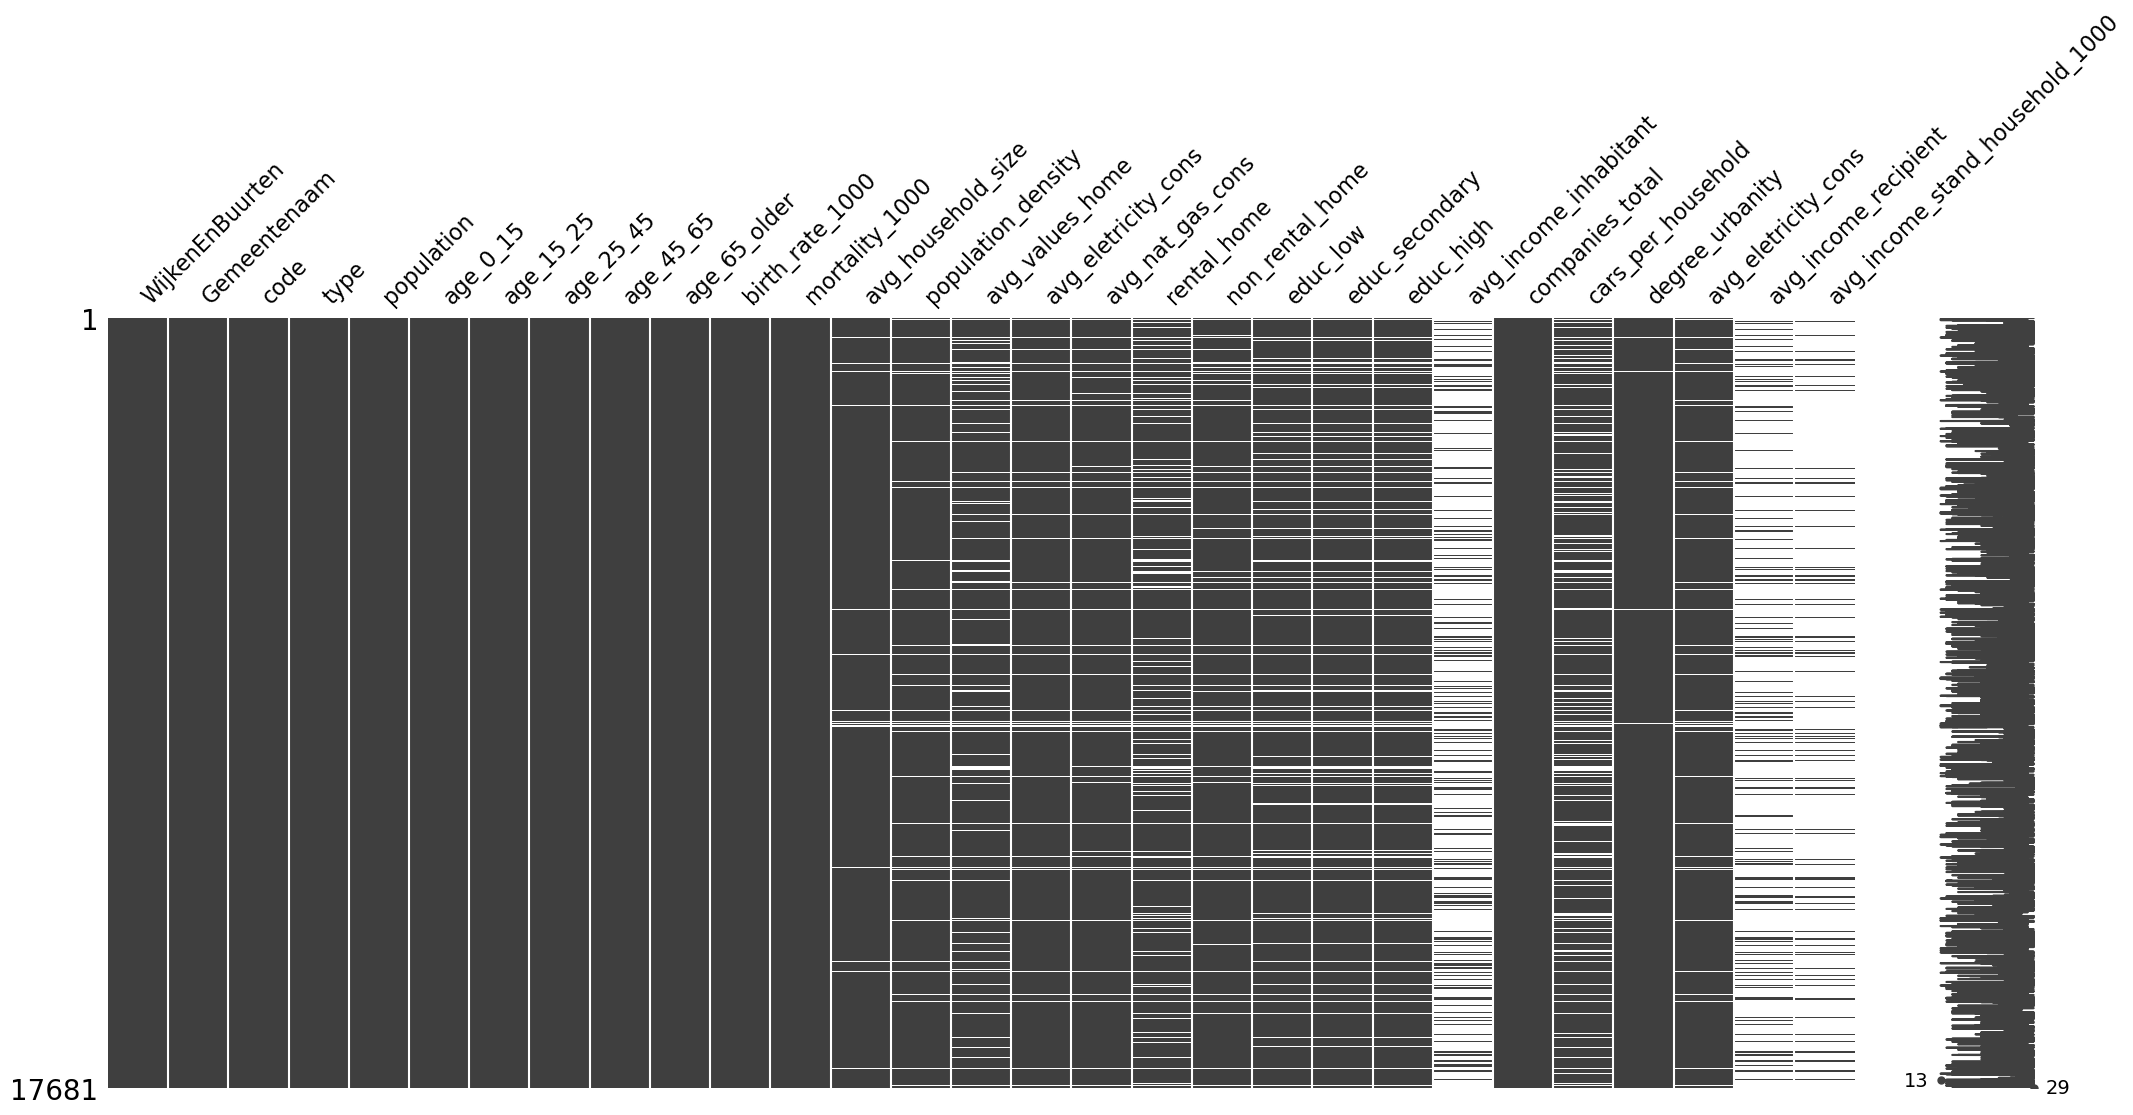

In [61]:
# check missingness
msno.matrix(gdf_cbs_filtered)

In [30]:
gdf_buurt = gpd.read_file("data_collection/income_data/WijkBuurtkaart_2018_v3/buurt_2018_v3.shp")

In [57]:
gdf_buurt_filtered = gdf_buurt.copy()
gdf_buurt_filtered = gdf_buurt_filtered[["BU_CODE", "BU_NAAM", "WK_CODE", "GM_CODE", "GM_NAAM", "geometry"]]
gdf_buurt_filtered

,BU_CODE,BU_NAAM,WK_CODE,GM_CODE,GM_NAAM,geometry
0,BU09989999,Buitenland,WK099899,GM0998,Buitenland,"MULTIPOLYGON (((122416.410 383920.760, 122395...."
1,BU00109998,NaN,WK001099,GM0010,Delfzijl,"MULTIPOLYGON (((268674.309 592382.331, 268667...."
2,BU00349997,NaN,WK003499,GM0034,Almere,"MULTIPOLYGON (((150213.998 479503.726, 150087...."
3,BU00509997,NaN,WK005099,GM0050,Zeewolde,"MULTIPOLYGON (((170588.413 486792.192, 170570...."
4,BU00569997,NaN,WK005699,GM0056,Zuidhorn,"MULTIPOLYGON (((214960.238 595344.114, 215030...."
...,...,...,...,...,...,...
13399,BU19550205,Verspreide huizen De Heegh,WK195502,GM1955,Montferland,"POLYGON ((206718.500 440320.094, 206724.094 44..."
13400,BU19550206,Verspreide huizen Greffelkamp,WK195502,GM1955,Montferland,"POLYGON ((204831.875 442520.751, 204833.020 44..."
13401,BU19550207,Verspreide huizen De Hogenend en Oud-Dijk,WK195502,GM1955,Montferland,"POLYGON ((205483.000 439755.688, 205473.297 43..."
13402,BU19550208,Verspreide huizen Nieuw-Dijk,WK195502,GM1955,Montferland,"POLYGON ((209695.907 440263.853, 209698.974 44..."


## Buurt level

In [58]:
merged_df = pd.merge(gdf_buurt_filtered, gdf_cbs_filtered, left_on='BU_CODE', right_on='code', how='left')
buurt_cbs_joined = gpd.GeoDataFrame(merged_df)

joined_data = gpd.sjoin(buurt_cbs_joined, vgvi, how='left', op='contains')
vgvi_by_bu = joined_data.groupby('BU_CODE')['VGVI'].mean().reset_index()

buurt_cbs_joined = buurt_cbs_joined.merge(vgvi_by_bu, on='BU_CODE', how='left')

C:\Users\Ondrej\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [98]:
# merged_df = pd.merge(gdf_cbs_filtered, gdf_buurt_filtered, left_on='code', right_on='BU_CODE', how='inner')
# cbs_buurt_joined = gpd.GeoDataFrame(merged_df)
# joined_data = gpd.sjoin(cbs_buurt_joined, vgvi, how='left', op='contains')
# vgvi_by_bu = joined_data.groupby('BU_NAAM')['VGVI'].mean().reset_index()
# cbs_buurt_joined = cbs_buurt_joined.merge(vgvi_by_bu, on='BU_NAAM', how='left')

C:\Users\Ondrej\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


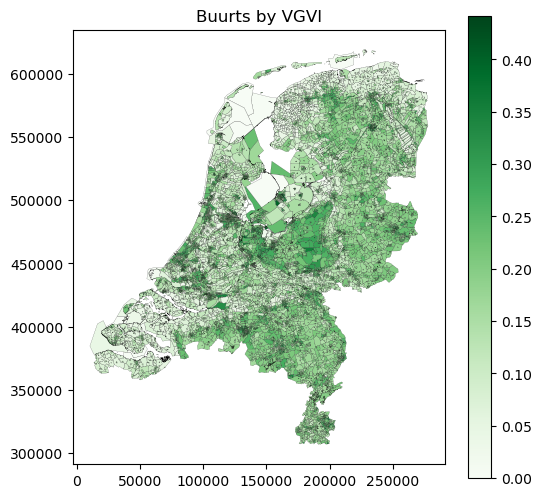

In [38]:
buurt_cbs_joined_filtered = buurt_cbs_joined[~buurt_cbs_joined['VGVI'].isnull()]
buurt_cbs_joined_filtered = buurt_cbs_joined_filtered.to_crs(epsg=28992)
fig, ax = plt.subplots(figsize=(6, 6))
buurt_cbs_joined_filtered.plot(column='VGVI', cmap='Greens', linewidth=0.1, edgecolor='black', legend=True, ax=ax)
plt.title('Buurts by VGVI')

plt.show()

## Wijk level

In [96]:
merged_df = pd.merge(gdf_buurt_filtered, gdf_cbs_filtered, left_on='WK_CODE', right_on='code', how='inner')
wijk_cbs_joined = gpd.GeoDataFrame(merged_df)

joined_data = gpd.sjoin(wijk_cbs_joined, vgvi, how='left', op='contains')
vgvi_by_wijk = joined_data.groupby('WK_CODE')['VGVI'].mean().reset_index()
wijk_cbs_joined = wijk_cbs_joined.merge(vgvi_by_wijk, on='WK_CODE', how='left')

# grouped_wijk_cbs = wijk_cbs_joined[["VGVI", "WK_CODE"]]
# grouped_wijk_cbs = grouped_wijk_cbs.drop_duplicates(subset=['WK_CODE'], keep='first')

C:\Users\Ondrej\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


# GWR 

In [116]:
from pysal.model import spreg

In [137]:
buurt_cbs_joined['avg_nat_gas_cons']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
13399    1780.0
13400    2070.0
13401    1330.0
13402    2070.0
13403    2140.0
Name: avg_nat_gas_cons, Length: 13404, dtype: float64

In [139]:
variable_names = [
    "companies_total", 
    "cars_per_household",  
    "degree_urbanity",  
    "avg_eletricity_cons",
    "avg_nat_gas_cons",
    "educ_high",
    "educ_secondary",
    "educ_low",
    "population_density",
    "avg_values_home"
]

variable_names.append("VGVI") 

filtered_gdf = buurt_cbs_joined.dropna(subset=variable_names)
# filtered_gdf = filtered_gdf.drop_duplicates() # remove duplicated columns
filtered_gdf = filtered_gdf.loc[:, ~filtered_gdf.columns.duplicated()]
filtered_gdf = filtered_gdf[variable_names].dropna()
filtered_gdf

,companies_total,cars_per_household,degree_urbanity,avg_eletricity_cons,avg_nat_gas_cons,educ_high,educ_secondary,educ_low,population_density,avg_values_home,VGVI
150,975.0,0.2,1.0,2170.0,1250.0,1870.0,2150.0,300.0,12192.0,222.0,0.097535
151,1620.0,0.2,1.0,2100.0,1170.0,2930.0,3070.0,360.0,11651.0,225.0,0.133514
152,590.0,0.2,1.0,1890.0,980.0,1840.0,1780.0,280.0,15441.0,191.0,0.154336
153,295.0,0.3,1.0,1970.0,1100.0,780.0,770.0,80.0,17200.0,226.0,0.133627
155,890.0,0.3,1.0,1990.0,1020.0,2550.0,2320.0,340.0,13019.0,224.0,0.141828
...,...,...,...,...,...,...,...,...,...,...,...
13399,30.0,0.6,4.0,6190.0,1780.0,70.0,50.0,40.0,260.0,419.0,0.129021
13400,75.0,1.7,5.0,4340.0,2070.0,70.0,130.0,160.0,69.0,342.0,0.148288
13401,210.0,1.5,4.0,3260.0,1330.0,310.0,500.0,190.0,267.0,275.0,0.166025
13402,160.0,1.5,5.0,4430.0,2070.0,140.0,320.0,190.0,96.0,345.0,0.166284


In [140]:
variable_names = [
    "companies_total", 
    "cars_per_household",  
    "degree_urbanity",  
    "avg_eletricity_cons",  
    "avg_nat_gas_cons",
    "educ_high",
    "educ_secondary",
    "educ_low",
    "population_density",
    "avg_values_home"
]

m1 = spreg.OLS(
    # Dependent variable
    filtered_gdf["VGVI"].values,
    # Independent variables
    filtered_gdf[variable_names].values,
    # Dependent variable name
    name_y="VGVI",
    # Independent variable name
    name_x=variable_names,
)

In [141]:
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :        VGVI                Number of Observations:        8877
Mean dependent var  :      0.1861                Number of Variables   :          11
S.D. dependent var  :      0.0587                Degrees of Freedom    :        8866
R-squared           :      0.1669
Adjusted R-squared  :      0.1659
Sum squared residual:      25.484                F-statistic           :    177.5811
Sigma-square        :       0.003                Prob(F-statistic)     :           0
S.E. of regression  :       0.054                Log likelihood        :   13383.361
Sigma-square ML     :       0.003                Akaike info criterion :  -26744.722
S.E of regression ML:      0.0536                Schwarz criterion     :  -26666.719

-----------------------------------------------------------------------------